In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Displaying all the columns in dataframe
pd.set_option("display.max_columns", None)

#Loading the data set
credit_data = pd.read_csv("credit dataset.csv", header=1, index_col= "ID")
credit_data.head()

,LIMIT,SEX,EDUCATION,MARITAL,AGE,Sep-05,Aug-05,Jul-05,Jun-05,May-05,Apr-05,BILL Sept 2005,BILL Aug 2005,BILL July 2005,BILL June 2005,BILL May 2005,BILL Apr 2005,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,230000,2,2,2,27,0,2,1,1,1,1,112,2709,1695,1696,237,1041,8,1092,1896,234,1047,2756,0
2,210000,1,1,2,35,0,0,2,8,2,8,3900,2726,27868,24069,13020,2702,2718,18000,16305,3000,3737,4202,0
3,500000,2,1,1,47,0,0,1,1,1,1,9915,31191,8705,2955,1004,3499,30963,7705,2186,1008,4492,6254,0
4,50000,1,3,1,57,0,0,0,0,0,8,10365,12619,12182,13157,17554,10091,3000,2004,2000,4000,2500,2000,0
5,470000,1,1,2,28,0,0,0,0,0,8,250817,474341,467273,429187,409086,403689,19000,36000,17000,15000,13000,17000,0


In [3]:
#Renaming the headers/column names
credit_data.rename(columns={"MARITAL ": "MARITAL_STAT",
                            "Sep-05": "delayedmonths_sep_2005",
                            "Aug-05": "delayedmonths_aug_2005",
                            "Jul-05": "delayedmonths_jul_2005",
                            "Jun-05": "delayedmonths_jun_2005",
                            "May-05": "delayedmonths_may_2005",
                            "Apr-05": "delayedmonths_apr_2005",
                            "PAY_AMT1": "paid_sep_2005",
                            "PAY_AMT2": "paid_aug_2005",
                            "PAY_AMT3": "paid_jul_2005",
                            "PAY_AMT4": "paid_jun_2005",
                            "PAY_AMT5": "paid_may_2005",
                            "PAY_AMT6": "paid_apr_2005"}, inplace=True)

credit_data.head()

,LIMIT,SEX,EDUCATION,MARITAL_STAT,AGE,delayedmonths_sep_2005,delayedmonths_aug_2005,delayedmonths_jul_2005,delayedmonths_jun_2005,delayedmonths_may_2005,delayedmonths_apr_2005,BILL Sept 2005,BILL Aug 2005,BILL July 2005,BILL June 2005,BILL May 2005,BILL Apr 2005,paid_sep_2005,paid_aug_2005,paid_jul_2005,paid_jun_2005,paid_may_2005,paid_apr_2005,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,230000,2,2,2,27,0,2,1,1,1,1,112,2709,1695,1696,237,1041,8,1092,1896,234,1047,2756,0
2,210000,1,1,2,35,0,0,2,8,2,8,3900,2726,27868,24069,13020,2702,2718,18000,16305,3000,3737,4202,0
3,500000,2,1,1,47,0,0,1,1,1,1,9915,31191,8705,2955,1004,3499,30963,7705,2186,1008,4492,6254,0
4,50000,1,3,1,57,0,0,0,0,0,8,10365,12619,12182,13157,17554,10091,3000,2004,2000,4000,2500,2000,0
5,470000,1,1,2,28,0,0,0,0,0,8,250817,474341,467273,429187,409086,403689,19000,36000,17000,15000,13000,17000,0


In [4]:
#Re-arranging the columns positions for easy analysis
credit_data = credit_data.loc[:, ["LIMIT", "SEX", "EDUCATION", "MARITAL_STAT", "AGE",
             "delayedmonths_apr_2005", "BILL Apr 2005", "paid_apr_2005",
             "delayedmonths_may_2005", "BILL May 2005", "paid_may_2005",
             "delayedmonths_jun_2005", "BILL June 2005", "paid_jun_2005",
             "delayedmonths_jul_2005", "BILL July 2005", "paid_jul_2005",
             "delayedmonths_aug_2005", "BILL Aug 2005", "paid_aug_2005",
             "delayedmonths_sep_2005", "BILL Sept 2005","paid_sep_2005",
             "default payment next month"]]

#Replacing values in Categorical variables in correct form
credit_data["SEX"] = credit_data["SEX"].map(lambda x: "male" if x == 1 else "female")
credit_data["EDUCATION"] = credit_data["EDUCATION"].replace([1,2,3,4],["Graduate School", "University", "High School", "Other"])
credit_data["MARITAL_STAT"] = credit_data["MARITAL_STAT"].replace([1,2,3],["Married", "Single", "Other"])


In [5]:
credit_data.head(20)

,LIMIT,SEX,EDUCATION,MARITAL_STAT,AGE,delayedmonths_apr_2005,BILL Apr 2005,paid_apr_2005,delayedmonths_may_2005,BILL May 2005,paid_may_2005,delayedmonths_jun_2005,BILL June 2005,paid_jun_2005,delayedmonths_jul_2005,BILL July 2005,paid_jul_2005,delayedmonths_aug_2005,BILL Aug 2005,paid_aug_2005,delayedmonths_sep_2005,BILL Sept 2005,paid_sep_2005,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,230000,female,University,Single,27,1,1041,2756,1,237,1047,1,1696,234,1,1695,1896,2,2709,1092,0,112,8,0
2,210000,male,Graduate School,Single,35,8,2702,4202,2,13020,3737,8,24069,3000,2,27868,16305,0,2726,18000,0,3900,2718,0
3,500000,female,Graduate School,Married,47,1,3499,6254,1,1004,4492,1,2955,1008,1,8705,2186,0,31191,7705,0,9915,30963,0
4,50000,male,High School,Married,57,8,10091,2000,0,17554,2500,0,13157,4000,0,12182,2000,0,12619,2004,0,10365,3000,0
5,470000,male,Graduate School,Single,28,8,403689,17000,0,409086,13000,0,429187,15000,0,467273,17000,0,474341,36000,0,250817,19000,0
6,280000,male,Graduate School,Single,30,1,2868,0,0,16065,2968,1,14373,1,2,1940,15378,0,2455,1957,0,2681,2553,0
7,150000,female,University,Single,40,8,117578,14000,0,113635,4549,0,130105,12000,0,131238,10000,0,121738,10000,0,142800,10000,0
8,280000,female,High School,Single,54,8,106301,10500,0,190618,5000,0,171439,20000,0,298083,10144,0,219412,30153,0,220050,10000,0
9,270000,female,Graduate School,Single,28,1,0,18568,1,1178,0,1,8591,1128,2,0,9292,0,0,0,0,0,0,0


## Task 1: Exploratory Data Analysis (EDA)

In [6]:
#Checking for missing values in the data
credit_data.isnull().sum()

LIMIT                         0
SEX                           0
EDUCATION                     0
MARITAL_STAT                  0
AGE                           0
delayedmonths_apr_2005        0
BILL Apr 2005                 0
paid_apr_2005                 0
delayedmonths_may_2005        0
BILL May 2005                 0
paid_may_2005                 0
delayedmonths_jun_2005        0
BILL June 2005                0
paid_jun_2005                 0
delayedmonths_jul_2005        0
BILL July 2005                0
paid_jul_2005                 0
delayedmonths_aug_2005        0
BILL Aug 2005                 0
paid_aug_2005                 0
delayedmonths_sep_2005        0
BILL Sept 2005                0
paid_sep_2005                 0
default payment next month    0
dtype: int64

In [7]:
#Checking for duplicate rows of data
credit_data.duplicated().sum()

7

In [8]:
#Dropping the duplicate rows
credit_data.drop_duplicates(inplace = True)
credit_data.shape

(67451, 24)

In [9]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67451 entries, 1 to 67458
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT                       67451 non-null  int64 
 1   SEX                         67451 non-null  object
 2   EDUCATION                   67451 non-null  object
 3   MARITAL_STAT                67451 non-null  object
 4   AGE                         67451 non-null  int64 
 5   delayedmonths_apr_2005      67451 non-null  int64 
 6   BILL Apr 2005               67451 non-null  int64 
 7   paid_apr_2005               67451 non-null  int64 
 8   delayedmonths_may_2005      67451 non-null  int64 
 9   BILL May 2005               67451 non-null  int64 
 10  paid_may_2005               67451 non-null  int64 
 11  delayedmonths_jun_2005      67451 non-null  int64 
 12  BILL June 2005              67451 non-null  int64 
 13  paid_jun_2005               67451 non-null  in

In [10]:
#Summarizing the data
credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT,67451.0,168125.745801,130741.191566,10000.0,60000.0,140000.0,240000.0,760000.0
AGE,67451.0,35.172881,9.134661,21.0,28.0,33.0,41.0,73.0
delayedmonths_apr_2005,67451.0,0.899868,1.374790,0.0,0.0,0.0,2.0,9.0
BILL Apr 2005,67451.0,36542.794280,54962.123007,0.0,1521.0,15577.0,48040.0,514975.0
paid_apr_2005,67451.0,4210.348223,12305.361263,0.0,196.0,1540.0,4000.0,373305.0
delayedmonths_may_2005,67451.0,0.738195,0.945010,0.0,0.0,0.0,2.0,7.0
BILL May 2005,67451.0,38627.517279,57119.255139,0.0,2101.5,17462.0,49265.5,530672.0
paid_may_2005,67451.0,3831.948748,10430.390179,0.0,300.0,1500.0,3990.5,330982.0
delayedmonths_jun_2005,67451.0,1.048999,1.850511,0.0,0.0,0.0,2.0,9.0
BILL June 2005,67451.0,41896.307942,60804.705261,0.0,2558.0,18705.0,53893.5,569034.0


In [11]:
num_total = credit_data.shape[0]
num_default = credit_data[credit_data["default payment next month"] == 1].shape[0]
default_pct = num_default/num_total*100
print(f"The default rate is {round(default_pct,2)}%")

The default rate is 22.35%


In [12]:
#Displaying number of Female vs Male credit card customers
credit_data["SEX"].value_counts()

female    40470
male      26981
Name: SEX, dtype: int64

In [13]:
defaulter_df = credit_data[credit_data["default payment next month"] == 1]

total_cust = credit_data.shape[0]
female_count = credit_data["SEX"].value_counts()["female"]
female_defaulter = defaulter_df["SEX"].value_counts()["female"]
male_count = credit_data["SEX"].value_counts()["male"]
male_defaulter = defaulter_df["SEX"].value_counts()["male"]

print(f"The percentage of Female defaulters is {round(100* female_defaulter/female_count,1)}%")
print(f"The percentage of Male defaulters is {round(100* male_defaulter/male_count,1)}%")

The percentage of Female defaulters is 20.9%
The percentage of Male defaulters is 24.5%


In [14]:
print("Total customers Educations wise:")
print(credit_data['EDUCATION'].value_counts(),"\n")

print("Number of defaulters in customers Education wise:")
print(defaulter_df["EDUCATION"].value_counts(),"\n--------------------------------------------------------------------------\n")

print("The percentage of defaulter customers with highest education qualification as University is", 
      round(100*defaulter_df["EDUCATION"].value_counts()["University"]/credit_data['EDUCATION'].value_counts()["University"],2))

print("The percentage of defaulter customers with highest education qualification as Graduate School is", 
      round(100*defaulter_df["EDUCATION"].value_counts()["Graduate School"]/credit_data['EDUCATION'].value_counts()["Graduate School"],2))

print("The percentage of defaulter customers with highest education qualification as High School is", 
      round(100*defaulter_df["EDUCATION"].value_counts()["High School"]/credit_data['EDUCATION'].value_counts()["High School"],2))

Total customers Educations wise:
University         32114
Graduate School    23460
High School        11418
Other                459
Name: EDUCATION, dtype: int64 

Number of defaulters in customers Education wise:
University         7640
Graduate School    4555
High School        2845
Other                38
Name: EDUCATION, dtype: int64 
--------------------------------------------------------------------------

The percentage of defaulter customers with highest education qualification as University is 23.79
The percentage of defaulter customers with highest education qualification as Graduate School is 19.42
The percentage of defaulter customers with highest education qualification as High School is 24.92


The categorical variables are ['SEX', 'EDUCATION', 'MARITAL_STAT']


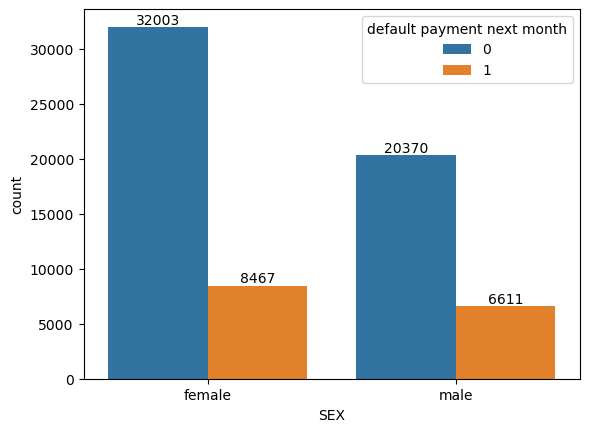

--------------------------------------------------------------------------------------


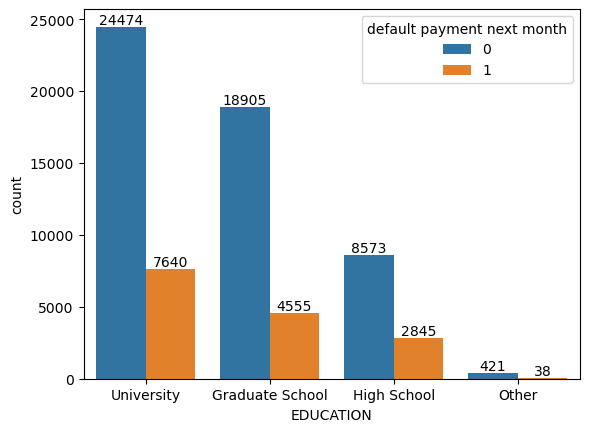

--------------------------------------------------------------------------------------


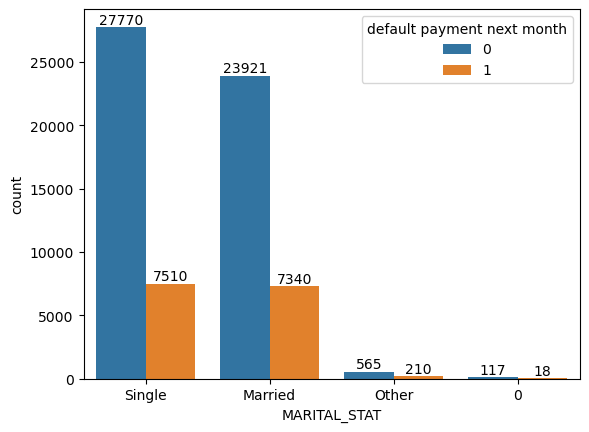

--------------------------------------------------------------------------------------


In [15]:
#Creating a plot for distribution of categorical variables by Default Next Month
cat_variables = credit_data.select_dtypes(include="object").columns
print("The categorical variables are",list(cat_variables))

for var in cat_variables:
    cat_count_plot = sns.countplot(data=credit_data, x=var, hue = "default payment next month", order=credit_data[var].value_counts().index)
    
    #Putting the values of each distribution on the bar
    for label in cat_count_plot.containers:
        cat_count_plot.bar_label(label)
        
    plt.show()
    print("--------------------------------------------------------------------------------------")

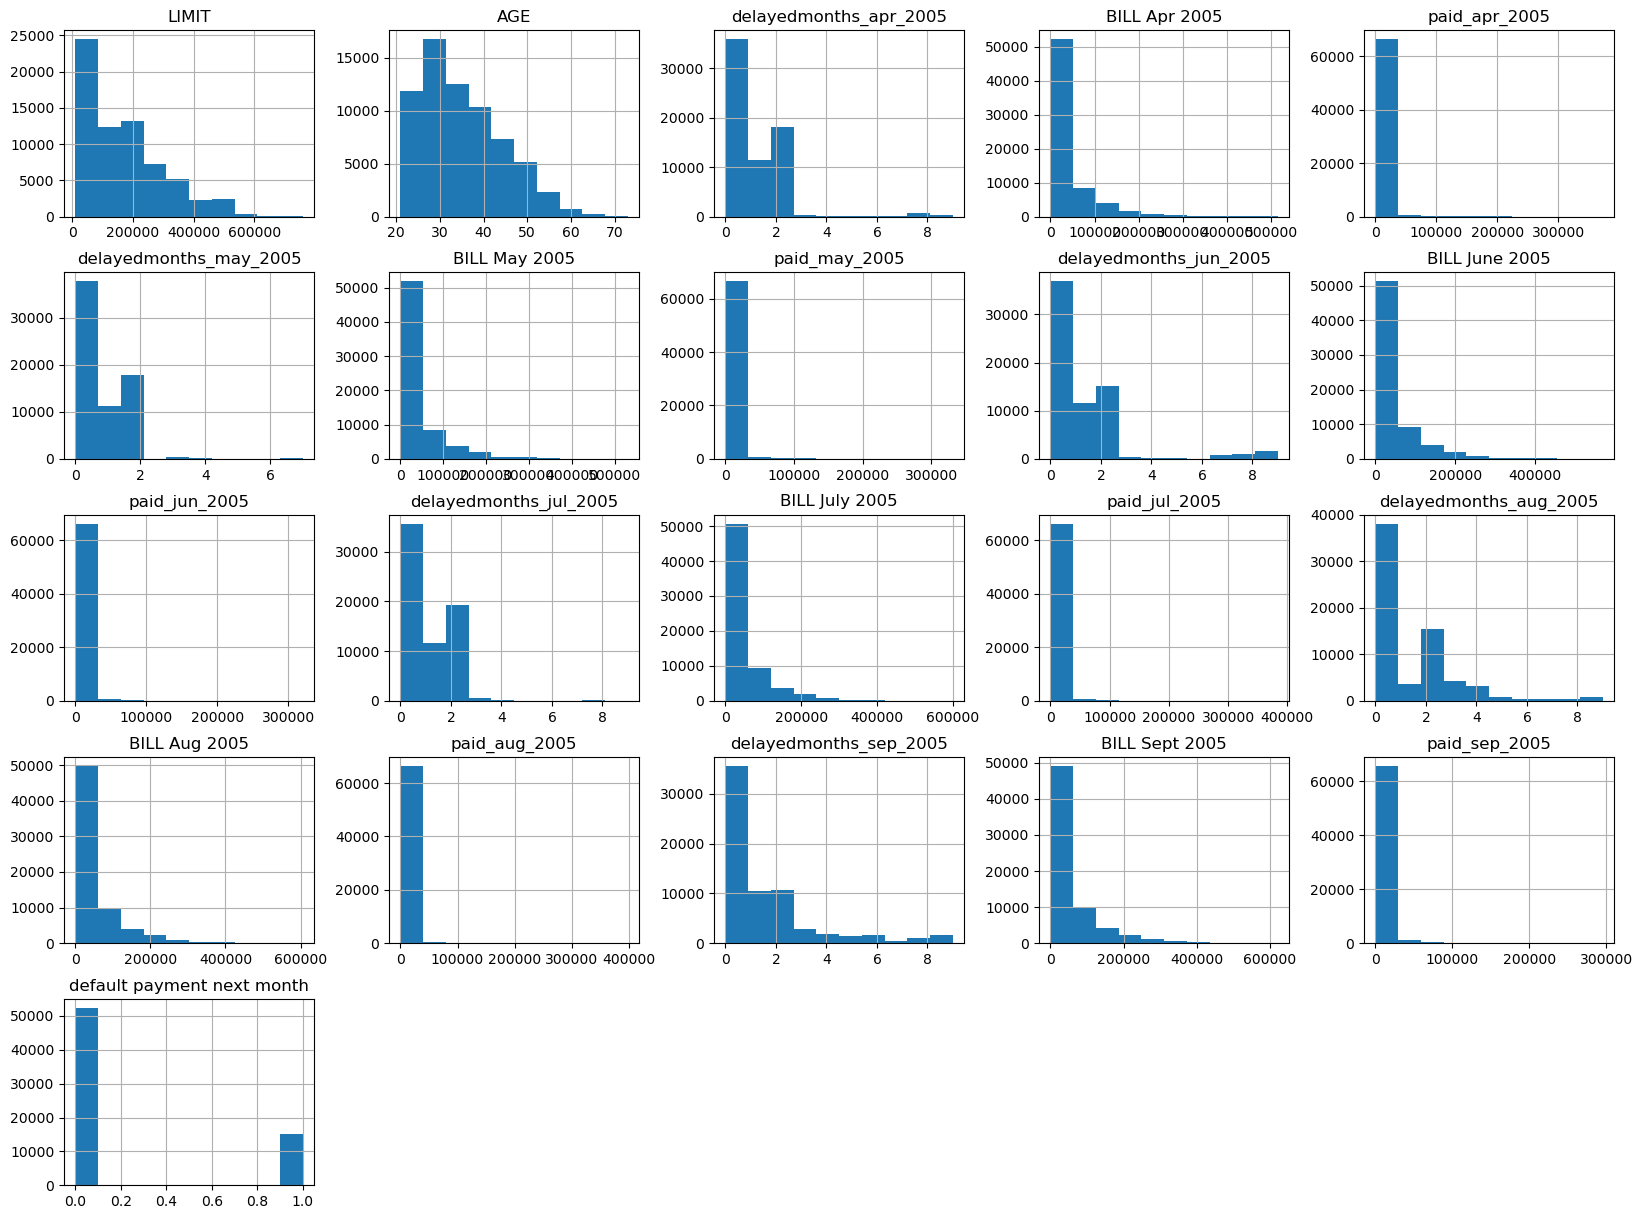

In [16]:
#Plot of Distributions of continous data
credit_data.hist(bins = 10, figsize=(20,15))
plt.show()

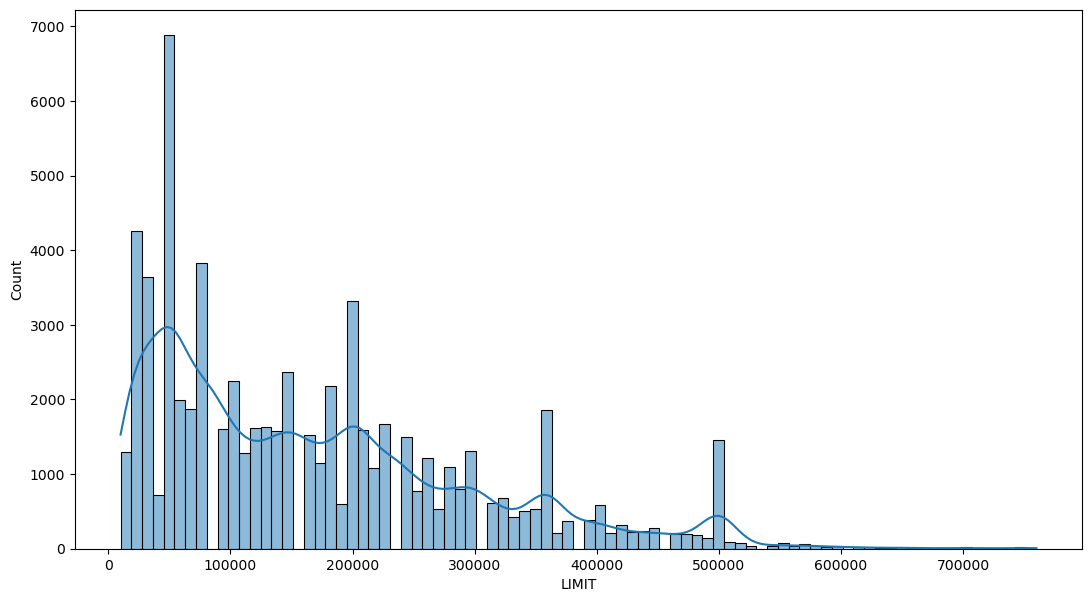

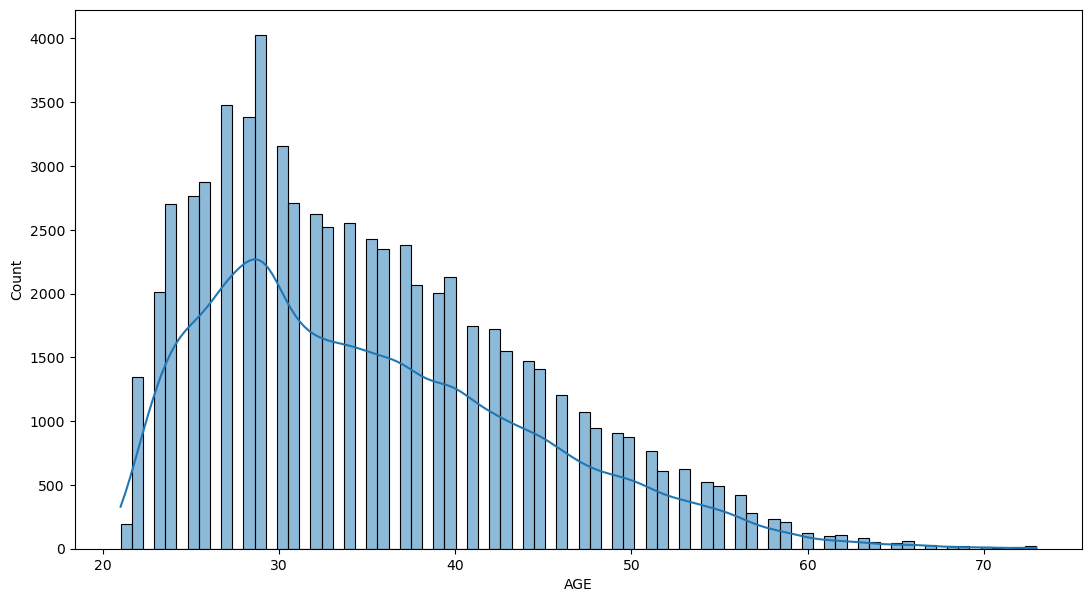

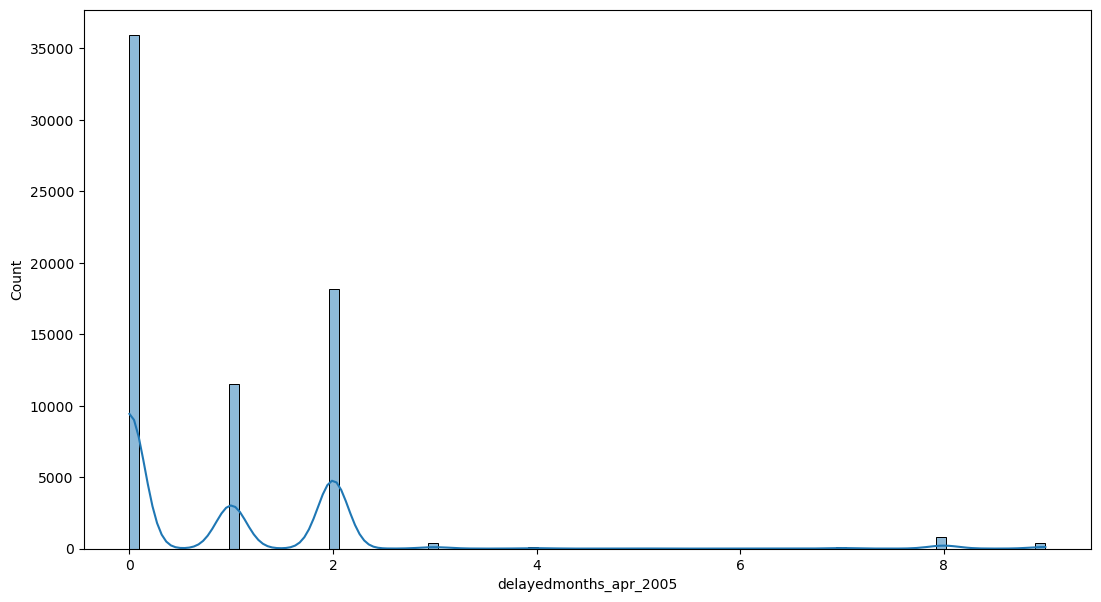

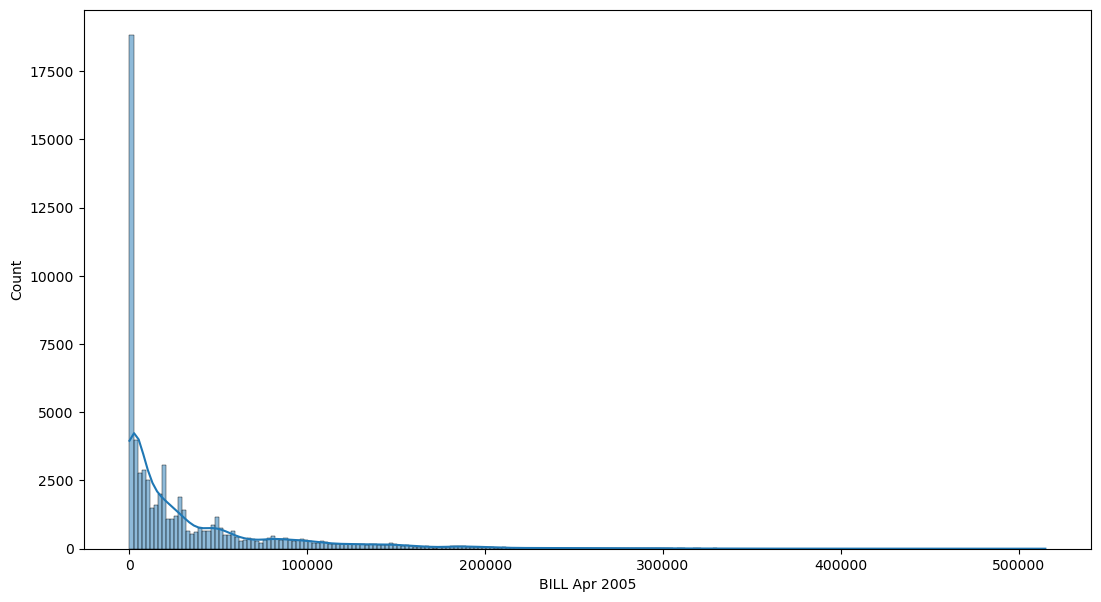

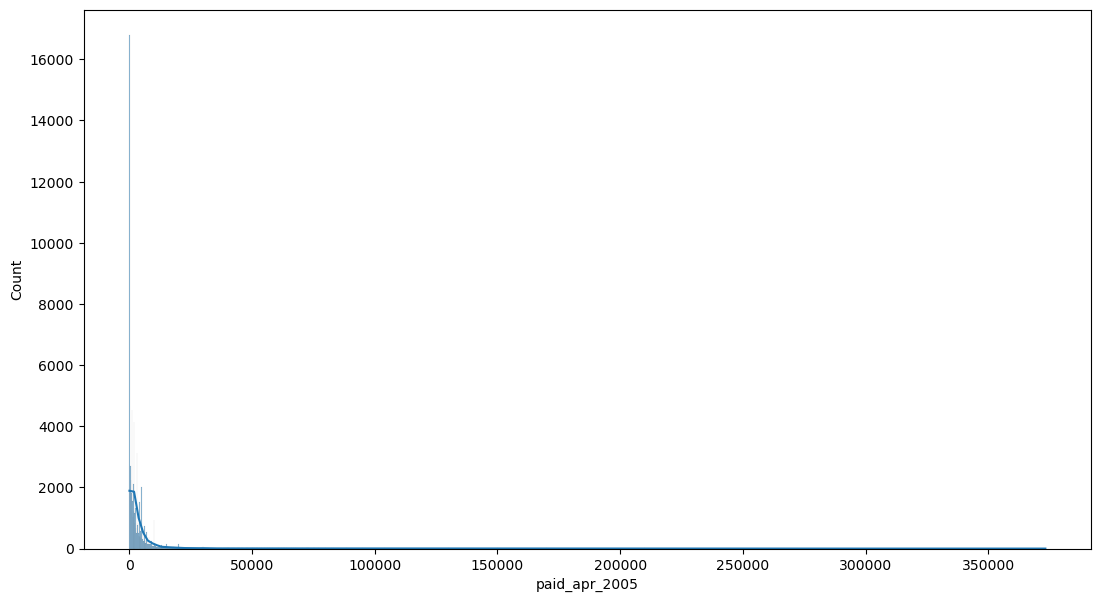

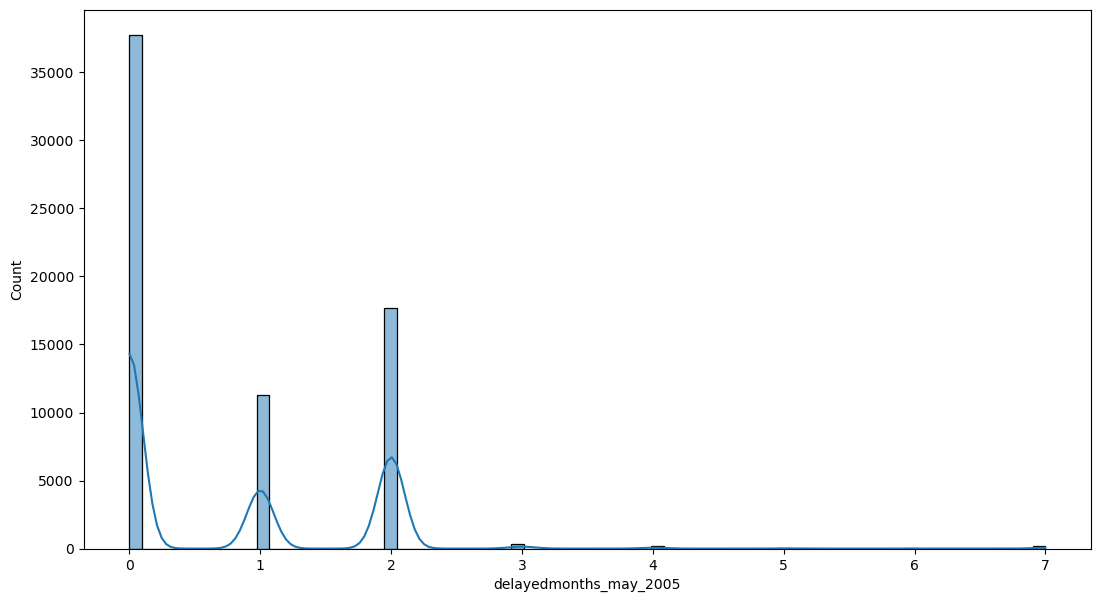

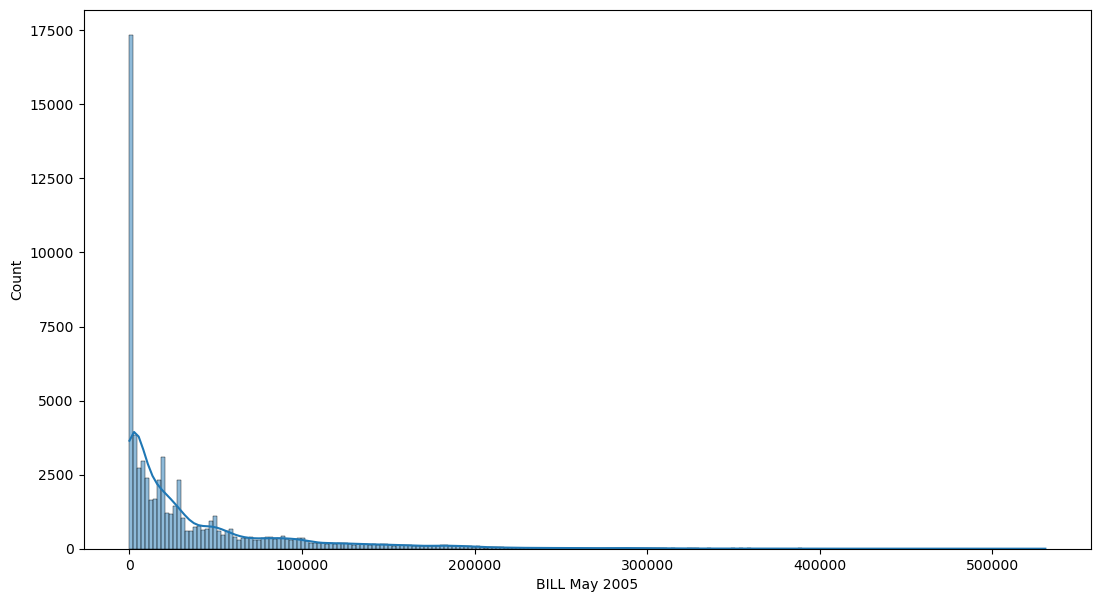

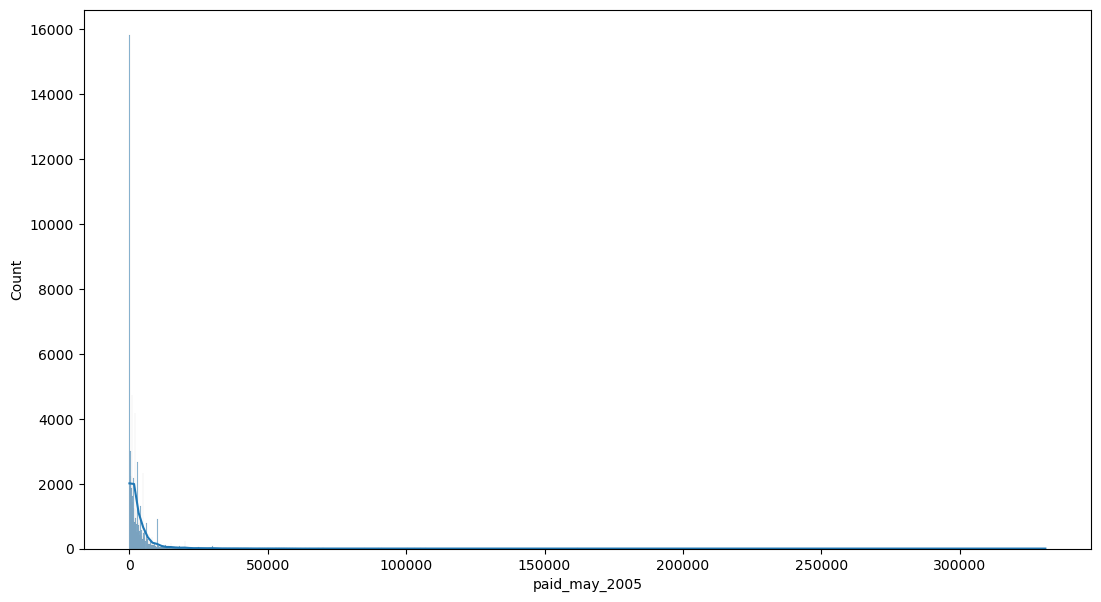

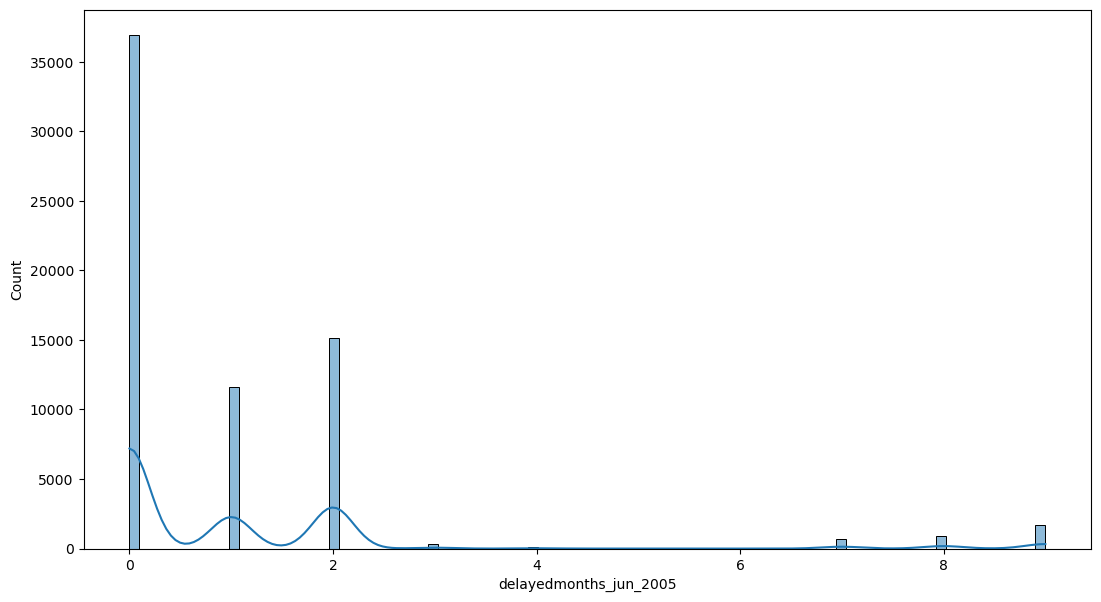

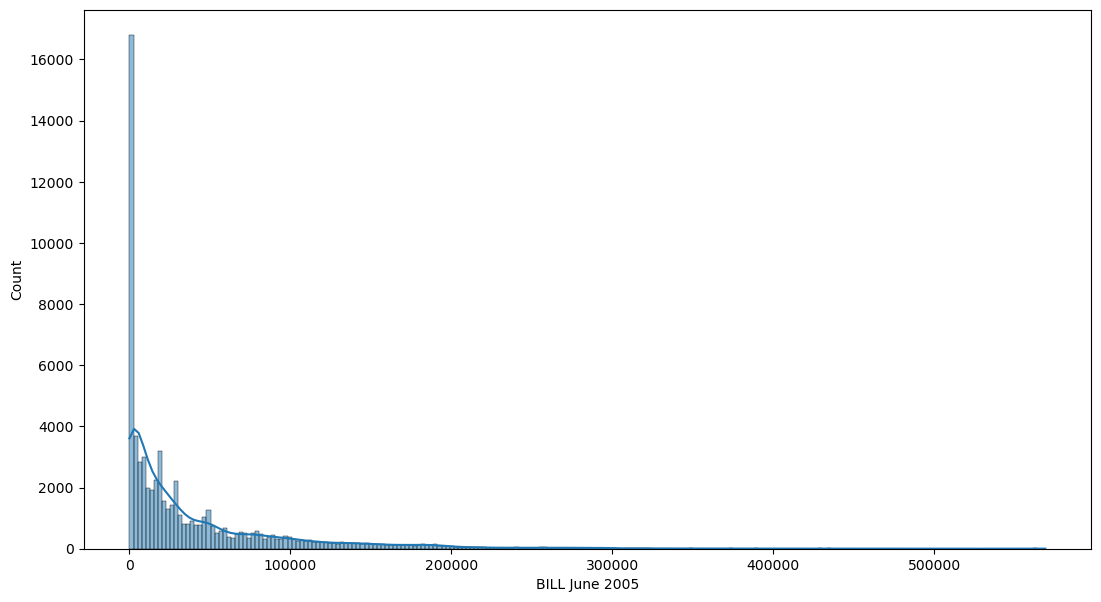

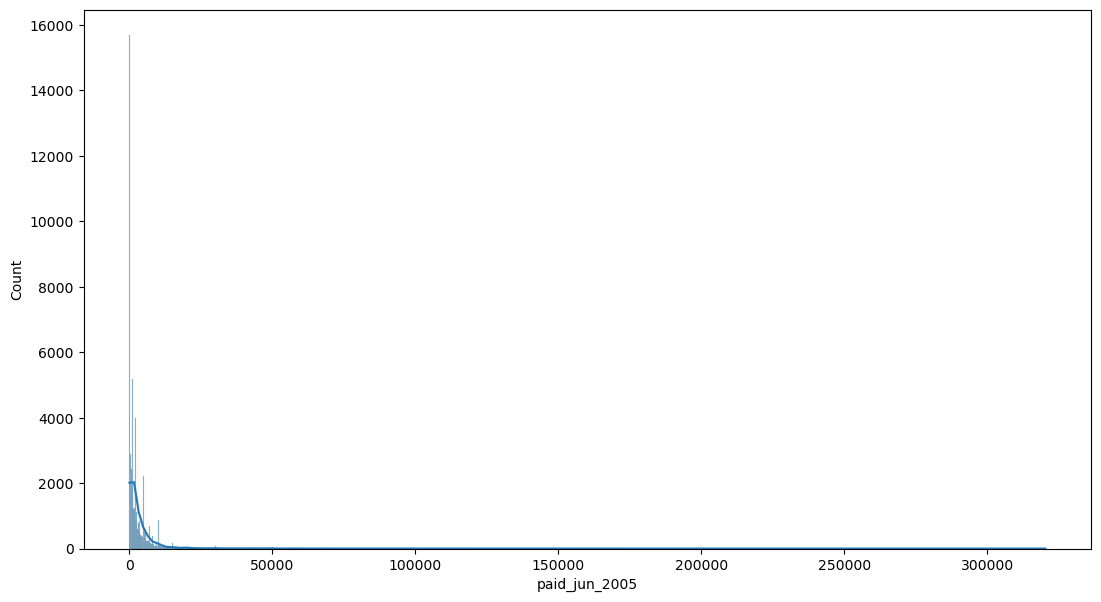

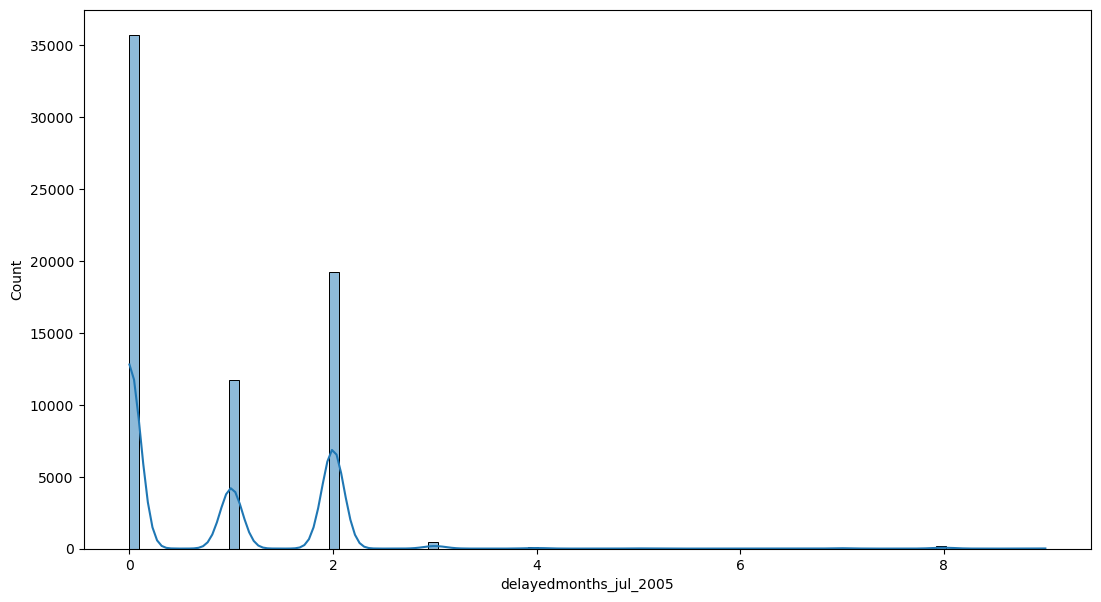

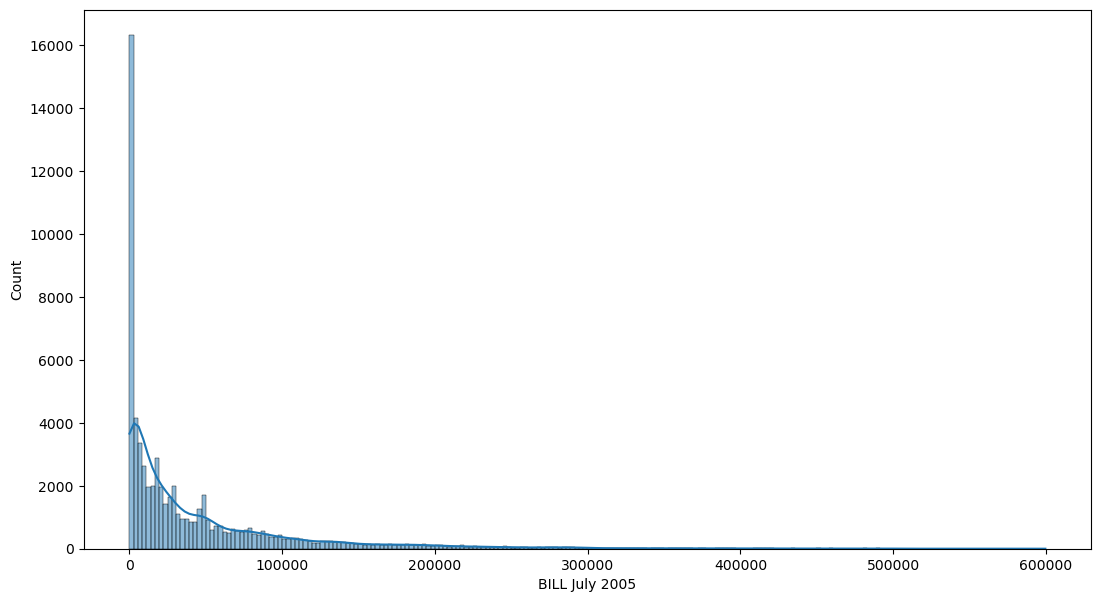

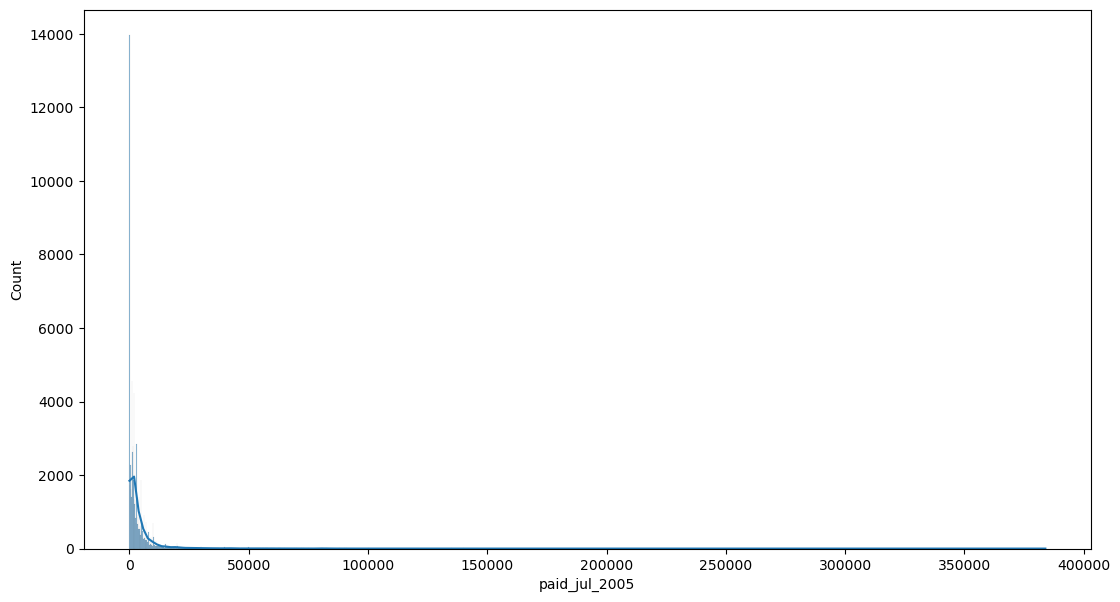

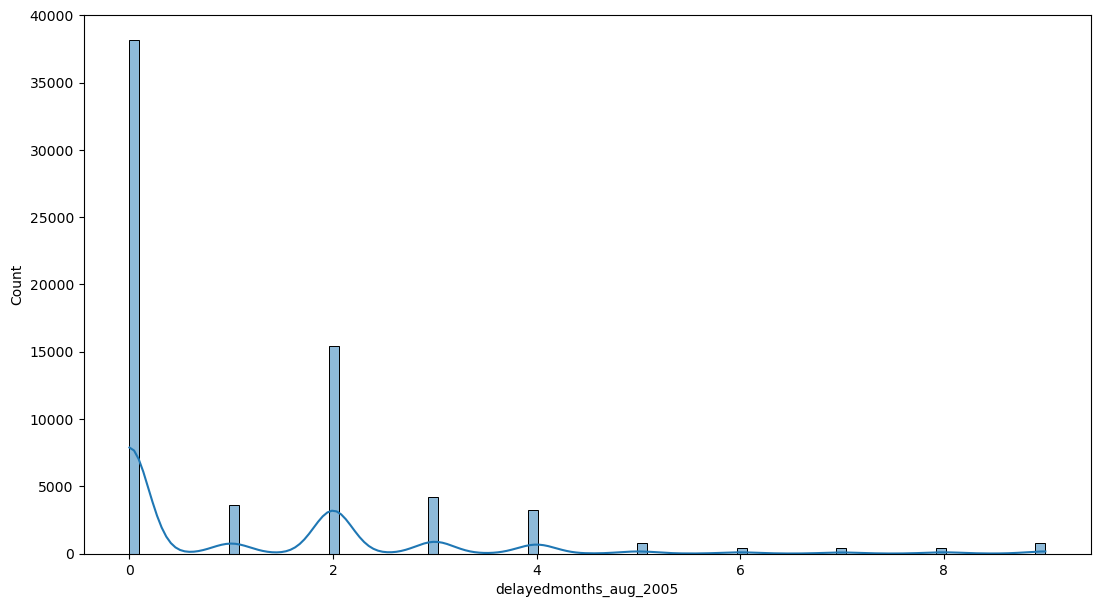

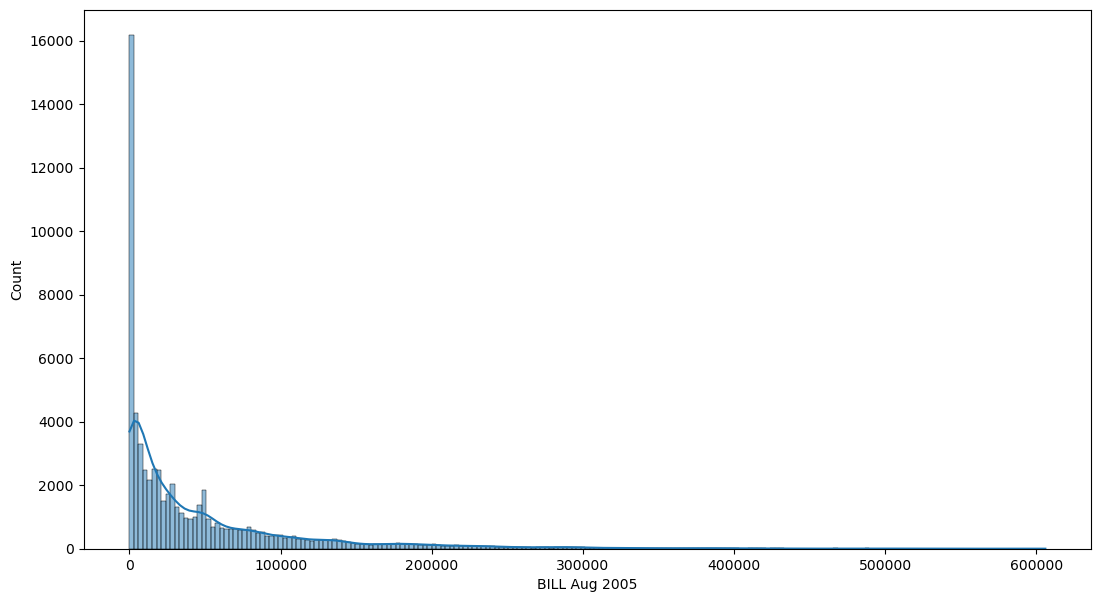

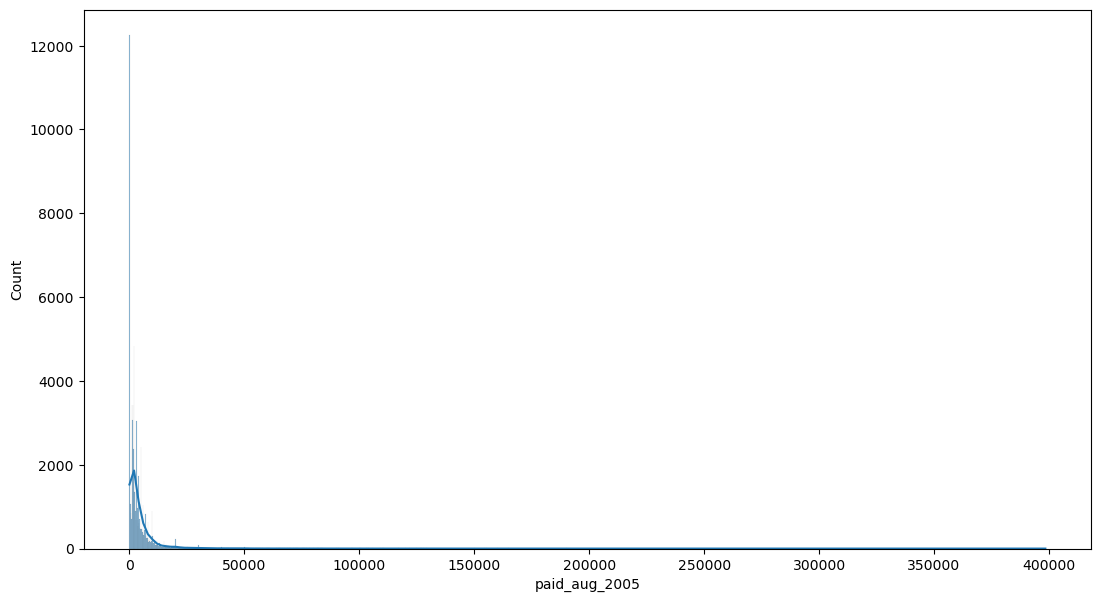

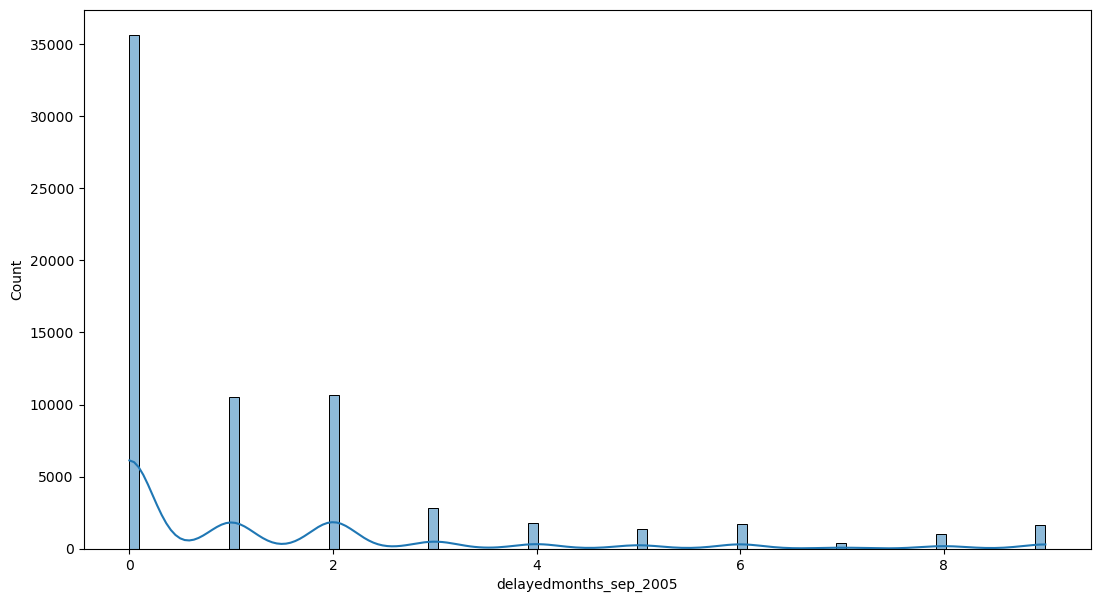

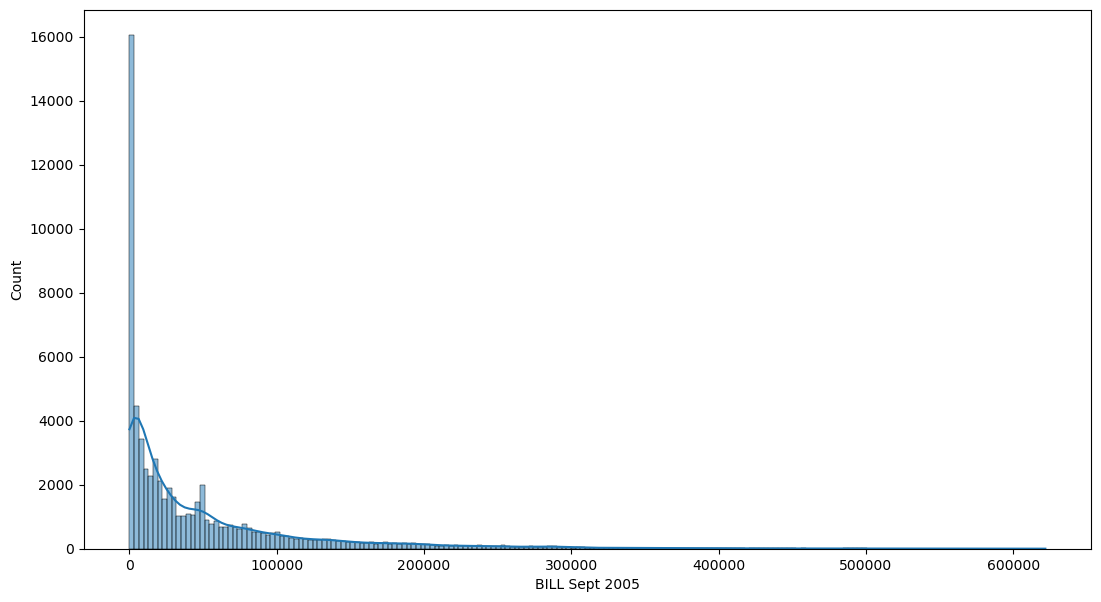

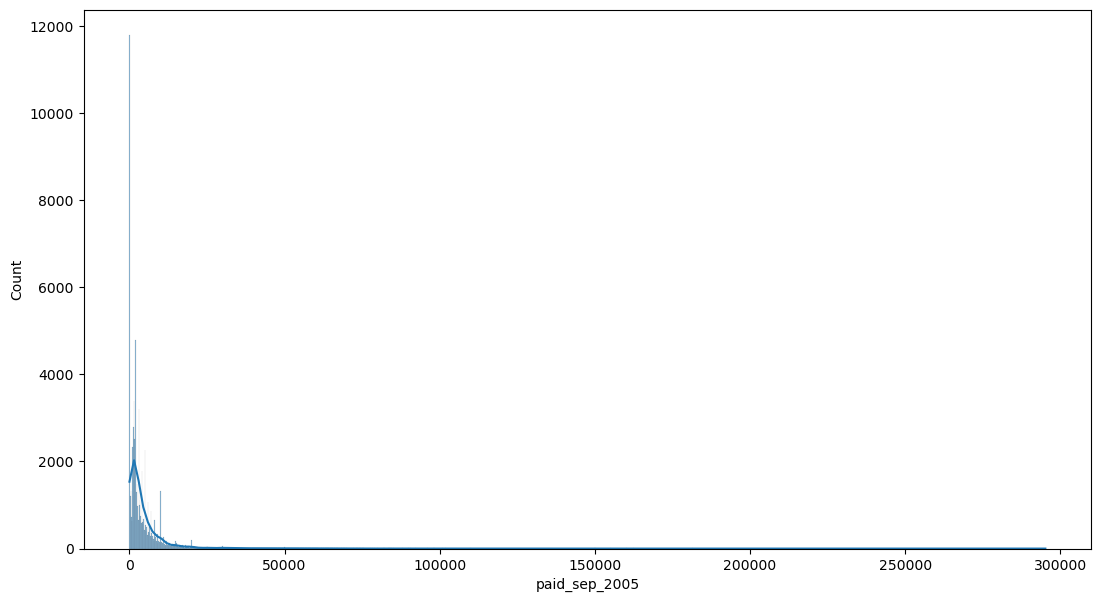

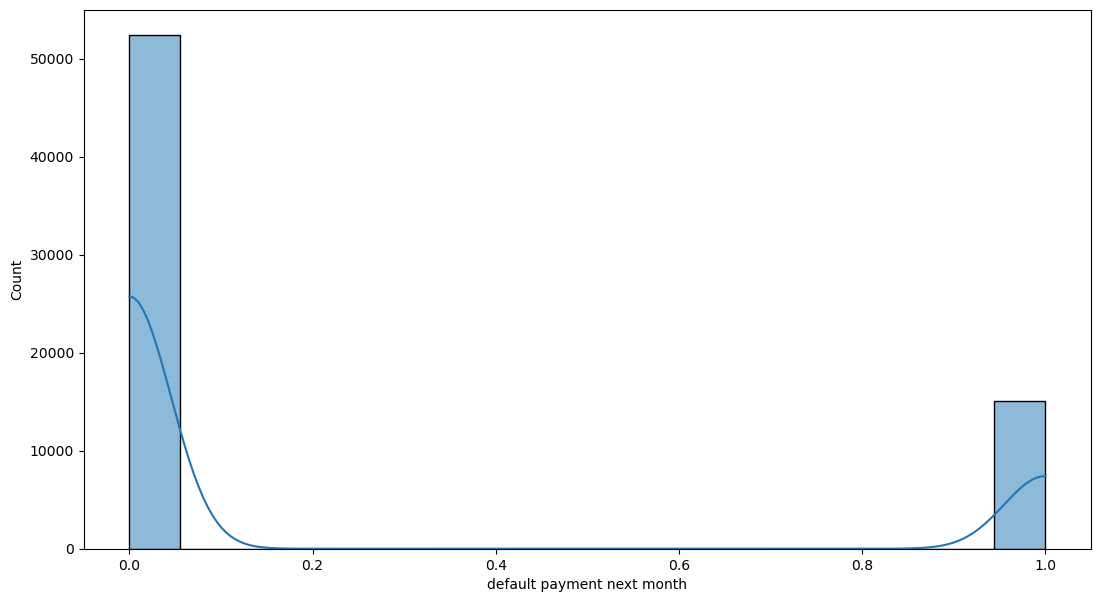

In [17]:
for col in credit_data.select_dtypes(include="number").columns:
    plt.figure(figsize=(13,7))
    
    sns.histplot(data = credit_data, x = col, kde = True)
    #plt.xticks(rotation = 90)
    plt.show()

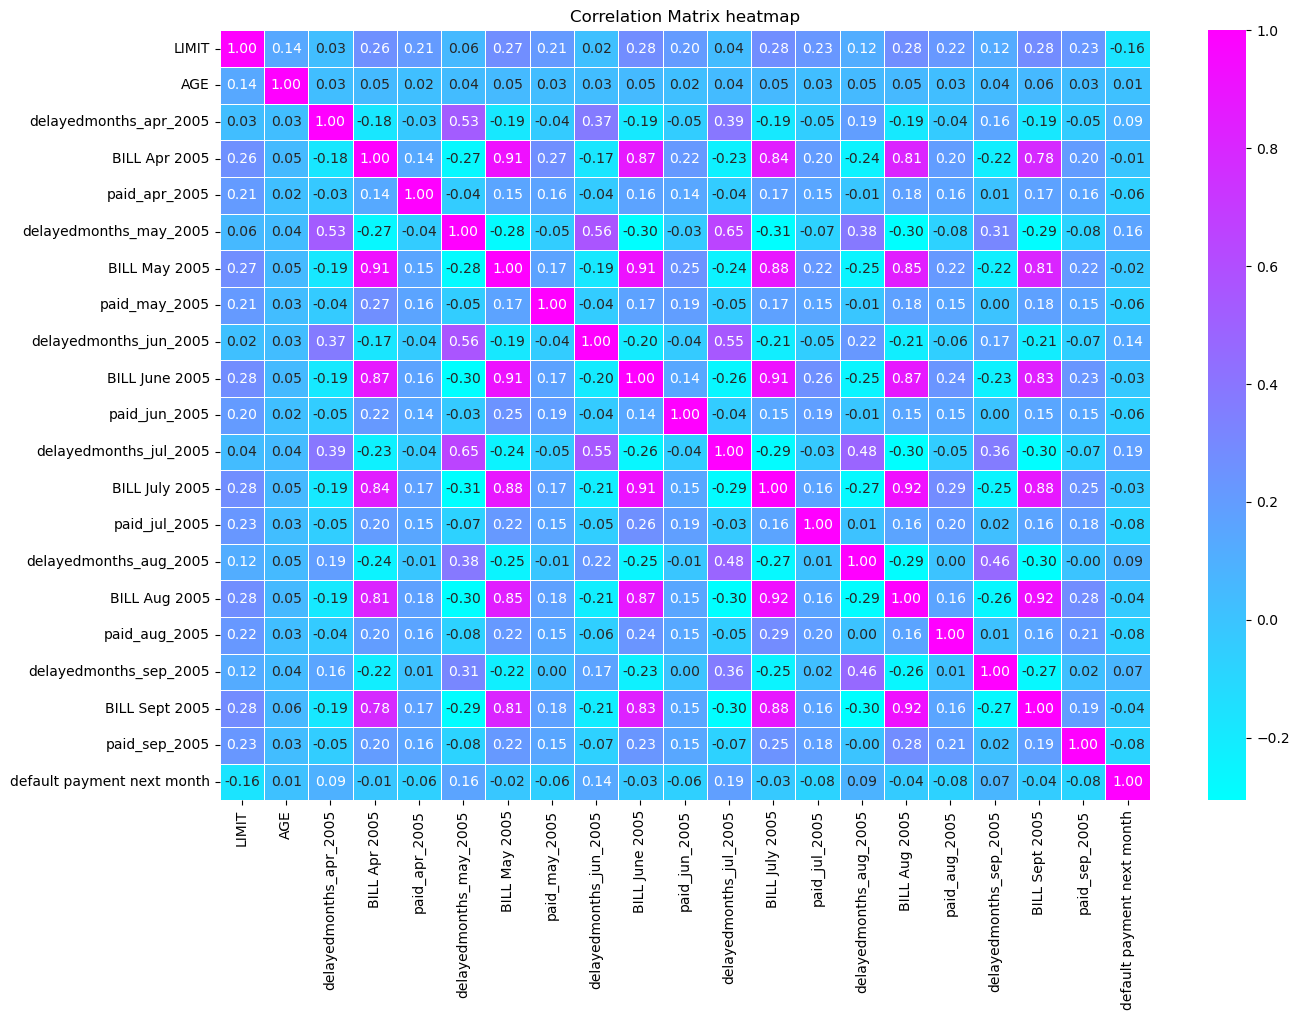

In [18]:
#Plot for correlation of numerical vairables in the data

plt.figure(figsize=(15,10))
correlation_matrix = credit_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap= "cool", linewidths= 0.7)
plt.title("Correlation Matrix heatmap")
plt.show()

### Insights:
1. The rate of customer defaulted in past 6 months of data is around 22%. 
2. 2/3rd of the credit card customers are Female in comparision to Male. It means usually women are the customers who spends using a credit card and they could be potential customer base.
3. The default rate of female customer base is 21%, and for male customer base is 24.5%.
4. The default rate of customers based on their education qualification for University is 23.79%, Graduate School is 19.42% and High School is 24.92%.
5. The month of August 2005 and Sept 2005 has the highest number of customers who delayed their monthly payments beyond 2 months as compared to Apr, May, Jun, Jul.